# Data Wrangling

In [95]:
import numpy as np
import pandas as pd
import requests

In [152]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### 2.1 Summarize the dataset by displaying the column data types, counts, and missing values.

In [48]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [49]:
df.count()

ResponseId             65437
MainBranch             65437
Age                    65437
Employment             65437
RemoteWork             54806
                       ...  
JobSatPoints_11        29445
SurveyLength           56182
SurveyEase             56238
ConvertedCompYearly    23435
JobSat                 29126
Length: 114, dtype: int64

In [50]:
missing_values = df.isnull().sum()
missing_values

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [8]:
# ALTERNATIVELY
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


### 2.2 Generate basic statistics for numerical columns.

In [51]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies

In [10]:
print(df.duplicated().sum())

0
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith, OfficeStackSyncW

In [52]:
df['Country'].value_counts()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Central African Republic                                    1
Equatorial Guinea                                           1
Niger                                                       1
Guinea                                                      1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64

In [76]:
big_country = df[df['Country'].str.len() > 20]
big_country['Country'].value_counts()

Country
United States of America                                11095
United Kingdom of Great Britain and Northern Ireland     3224
Iran, Islamic Republic of...                              411
Venezuela, Bolivarian Republic of...                       69
Bosnia and Herzegovina                                     62
Republic of North Macedonia                                36
United Republic of Tanzania                                28
Congo, Republic of the...                                   8
Lao People's Democratic Republic                            4
Libyan Arab Jamahiriya                                      4
Democratic Republic of the Congo                            3
Democratic People's Republic of Korea                       2
Central African Republic                                    1
Saint Kitts and Nevis                                       1
Micronesia, Federated States of...                          1
Name: count, dtype: int64

In [77]:
df['Country'] = df['Country'].replace({'United States of America': 'USA'})
df['Country'] = df['Country'].replace({'United Kingdom of Great Britain and Northern Ireland': 'UK'})

In [78]:
df.loc[df['Country'].str.contains('Iran, Islamic Republic', case=False, na=False), 'Country'] = 'Iran'

In [56]:
df.loc[df['Country'].str.contains('Venezuela, Bolivarian Republic', case=False, na=False), 'Country'] = 'Venezuela'
df.loc[df['Country'].str.contains('Republic of North Macedonia', case=False, na=False), 'Country'] = 'North Macedonia'
df.loc[df['Country'].str.contains('United Republic of Tanzania', case=False, na=False), 'Country'] = 'Tanzania'
df.loc[df['Country'].str.contains('Congo, Republic of', case=False, na=False), 'Country'] = 'Congo'
df.loc[df['Country'].str.contains('Lao People\'s Democratic Republic', case=False, na=False), 'Country'] = 'Lao'
df.loc[df['Country'].str.contains('Democratic People\'s Republic of Korea', case=False, na=False), 'Country'] = 'Korea'
df.loc[df['Country'].str.contains('Central African Republic', case=False, na=False), 'Country'] = 'African'

In [79]:
df.loc[df['Country'].str.contains('Micronesia, Federated States of', case=False, na=False), 'Country'] = 'Micronesia'
df.loc[df['Country'].str.contains('Democratic Republic of the Congo', case=False, na=False), 'Country'] = 'Congo'
df.loc[df['Country'].str.contains('Bosnia and Herzegovina', case=False, na=False), 'Country'] = 'Bosnia'
df.loc[df['Country'].str.contains('Libyan Arab Jamahiriya', case=False, na=False), 'Country'] = 'Libya'
df.loc[df['Country'].str.contains('Saint Kitts and Nevis', case=False, na=False), 'Country'] = 'Nevis'

In [80]:
df['Country'].value_counts()

Country
USA                         11095
Germany                      4947
India                        4231
UK                           3224
Ukraine                      2672
                            ...  
Central African Republic        1
Equatorial Guinea               1
Niger                           1
Guinea                          1
Solomon Islands                 1
Name: count, Length: 185, dtype: int64

In [81]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

In [39]:
edLevel_maps = {
    'Master': 'Masters Degree',
    'Bachelor': 'Bachelor Degree',
    'Secondary school': 'High School Diploma',
    'Some college': 'Some college',
    'Professional degree': 'Professional degree',
    'Associate degree': 'Associate degree',
    'Primary/': 'Elementary School',
    'Something else': 'Others'
}

In [82]:
def replace_edLevel(value: str) -> str:
    for key, val in edLevel_maps.items():
        if key in str(value):
            return val
    return value
        
df['EdLevel'] = df['EdLevel'].apply(replace_edLevel)

In [63]:
df['EdLevel'].value_counts()

EdLevel
Bachelor Degree        24942
Masters Degree         15557
Some college            7651
High School Diploma     5793
Professional degree     2970
Associate degree        1793
Elementary School       1146
Others                   932
Name: count, dtype: int64

In [83]:
missing_edLevel = df['EdLevel'].isnull().sum()
missing_edLevel

np.int64(4653)

In [84]:
freq = df['EdLevel'].mode()[0]
df['EdLevel'] = df['EdLevel'].fillna(freq)
df['EdLevel'].value_counts()

EdLevel
Bachelor Degree        29595
Masters Degree         15557
Some college            7651
High School Diploma     5793
Professional degree     2970
Associate degree        1793
Elementary School       1146
Others                   932
Name: count, dtype: int64

In [85]:
any_missing = df['EdLevel'].isnull().sum()
any_missing

np.int64(0)

#### 4.1 Encode the Employment column using one-hot encoding.

In [86]:
df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3557
Not employed, but looking for work                                                                                                                    2341
                                                                                                                                                     ...  
Employed, full-time;Student, full-time;Independent contract

In [87]:
def categorize_employment(status: str) -> str:
    # Prioritize freelancer/self-employed over part-time employment
    if 'Independent contractor, freelancer, self-employed' in status:
        return 'Freelancer/Self-employed'
    elif 'Employed, full-time' in status:
        return 'Employment-Full time'
    elif 'Employed, part-time' in status:
        return 'Employment-Part time'
    elif 'Student, full-time' in status:
        return 'Student-Full time'
    elif 'Student, part-time' in status:
        return 'Student-Part time'
    elif 'Not employed, but looking for work' or 'not employed' or 'looking for work' in status:
        return 'Unemployed/Looking for job'
    elif 'Retired' in status:
        return 'Retired'
    else:
        return 'Other'

df['Employment'] = df['Employment'].apply(categorize_employment)

In [88]:
df['Employment'].value_counts()

Employment
Employment-Full time          45162
Unemployed/Looking for job     9470
Student-Full time              6285
Employment-Part time           3639
Student-Part time               881
Name: count, dtype: int64

In [90]:
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,Employment-Full time,Remote,Apples,Hobby,Elementary School,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,Employment-Full time,Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor Degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,Employment-Full time,Remote,Apples,Hobby;Contribute to open-source projects;Other...,Masters Degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,Student-Full time,NaN,Apples,NaN,Some college,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,Student-Full time,NaN,Apples,NaN,High School Diploma,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,Employment-Full time,Remote,Apples,Hobby;School or academic work,Bachelor Degree,"On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,Employment-Full time,Remote,Apples,Hobby;Contribute to open-source projects,Bachelor Degree,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,Employment-Full time,In-person,Apples,Hobby,Bachelor Degree,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,Employment-Full time,"Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,High School Diploma,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [91]:
df_encoded = pd.get_dummies(df['Employment'], prefix='Employment')
df = pd.concat([df, df_encoded], axis=1)
df = df.drop('Employment', axis=1)

In [92]:
df

,ResponseId,MainBranch,Age,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Employment_Employment-Full time,Employment_Employment-Part time,Employment_Student-Full time,Employment_Student-Part time,Employment_Unemployed/Looking for job
0,1,I am a developer by profession,Under 18 years old,Remote,Apples,Hobby,Elementary School,Books / Physical media,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False
1,2,I am a developer by profession,35-44 years old,Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor Degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,0.0,NaN,NaN,NaN,NaN,True,False,False,False,False
2,3,I am a developer by profession,45-54 years old,Remote,Apples,Hobby;Contribute to open-source projects;Other...,Masters Degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,NaN,Appropriate in length,Easy,NaN,NaN,True,False,False,False,False
3,4,I am learning to code,18-24 years old,NaN,Apples,NaN,Some college,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,NaN,Too long,Easy,NaN,NaN,False,False,True,False,False
4,5,I am a developer by profession,18-24 years old,NaN,Apples,NaN,High School Diploma,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,NaN,Too short,Easy,NaN,NaN,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,Remote,Apples,Hobby;School or academic work,Bachelor Degree,"On the job training;School (i.e., University, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False
65433,65434,I am a developer by profession,25-34 years old,Remote,Apples,Hobby;Contribute to open-source projects,Bachelor Degree,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False
65434,65435,I am a developer by profession,25-34 years old,In-person,Apples,Hobby,Bachelor Degree,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,API document(s) and/or SDK document(s);AI-powe...,...,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False
65435,65436,I am a developer by profession,18-24 years old,"Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,High School Diploma,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,0.0,NaN,NaN,NaN,NaN,True,False,False,False,False


# Handling Missing Values

##### 5.1 Identify columns with the highest number of missing values.

In [100]:
h_missing = df.isnull().sum()
h_missing.sort_values(ascending=False)

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
MainBranch                        0
Check                             0
Employment                        0
Age                               0
ResponseId                        0
Length: 114, dtype: int64

### 5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.

In [102]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
df[numerical_columns].head()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
0,1,2.963841e+145,11.466957,18.581094,7.52214,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,86155.287263,6.935041
1,2,2.963841e+145,17.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,86155.287263,6.935041
2,3,2.963841e+145,11.466957,18.581094,7.52214,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,86155.287263,6.935041
3,4,2.963841e+145,11.466957,18.581094,7.52214,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,86155.287263,6.935041
4,5,2.963841e+145,11.466957,18.581094,7.52214,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,86155.287263,6.935041


### 5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.

In [107]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df[categorical_columns].head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase
0,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,None of these,Hybrid (on-prem and cloud),Traditional public search engine,Software Development,Appropriate in length,Easy
1,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,None of these,Hybrid (on-prem and cloud),Traditional public search engine,Software Development,Appropriate in length,Easy
2,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,None of these,Hybrid (on-prem and cloud),Traditional public search engine,Software Development,Appropriate in length,Easy
3,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,API document(s) and/or SDK document(s);User gu...,...,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,None of these,Hybrid (on-prem and cloud),Traditional public search engine,Software Development,Too long,Easy
4,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,None of these,Hybrid (on-prem and cloud),Traditional public search engine,Software Development,Too short,Easy


# 5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.

In [112]:
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

In [113]:
df['RemoteWork'] = df['RemoteWork'].replace({'Hybrid (some remote, some in-person)': 'Hybrid'})

In [114]:
df['RemoteWork'].value_counts()

RemoteWork
Hybrid       33646
Remote       20831
In-person    10960
Name: count, dtype: int64

# Feature Scaling and Transformation
### 6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.

In [115]:
!conda install scikit-learn -y

/Users/hasan/miniconda3/lib/python3.12/site-packages/conda/base/context.py:201: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(
Retrieving notices: done
/Users/hasan/miniconda3/lib/python3.12/site-packages/conda/base/context.py:201: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/s

In [134]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [118]:
df.shape

(65437, 114)

In [122]:
# Checking if any missing value in this column
x = df['ConvertedCompYearly'].isnull().sum()
print(x)

0


In [128]:
scaler = MinMaxScaler()
scaller_value = scaler.fit_transform(df[['ConvertedCompYearly']])

In [131]:
df['ConvertedCompYearly_Normalized'] = scaller_value
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_Normalized
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.00000,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.935041,0.0053
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053
3,4,I am learning to code,18-24 years old,"Student, full-time",Hybrid,Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,22.96522,20.278165,16.169432,10.955713,9.953948,Too long,Easy,86155.287263,6.935041,0.0053
4,5,I am a developer by profession,18-24 years old,"Student, full-time",Hybrid,Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Too short,Easy,86155.287263,6.935041,0.0053


In [138]:
xx = np.log10(df['ConvertedCompYearly'])
df['ConvertedCompYearly_log'] = xx
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_Normalized,ConvertedCompYearly_log
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282
3,4,I am learning to code,18-24 years old,"Student, full-time",Hybrid,Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,20.278165,16.169432,10.955713,9.953948,Too long,Easy,86155.287263,6.935041,0.0053,4.935282
4,5,I am a developer by profession,18-24 years old,"Student, full-time",Hybrid,Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,20.278165,16.169432,10.955713,9.953948,Too short,Easy,86155.287263,6.935041,0.0053,4.935282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",Technical documentation;Blogs;Written Tutorial...,...,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time",Hybrid,Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282


### 6.2 Log-transform the ConvertedCompYearly column to reduce skewness.

In [139]:
# Handle Non-Positive Values:
df = df[df['ConvertedCompYearly_log'] > 0]
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_Normalized,ConvertedCompYearly_log
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282
3,4,I am learning to code,18-24 years old,"Student, full-time",Hybrid,Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,20.278165,16.169432,10.955713,9.953948,Too long,Easy,86155.287263,6.935041,0.0053,4.935282
4,5,I am a developer by profession,18-24 years old,"Student, full-time",Hybrid,Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,20.278165,16.169432,10.955713,9.953948,Too short,Easy,86155.287263,6.935041,0.0053,4.935282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",Technical documentation;Blogs;Written Tutorial...,...,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time",Hybrid,Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.935041,0.0053,4.935282


In [140]:
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_log']])

       ConvertedCompYearly  ConvertedCompYearly_log
0             86155.287263                 4.935282
1             86155.287263                 4.935282
2             86155.287263                 4.935282
3             86155.287263                 4.935282
4             86155.287263                 4.935282
...                    ...                      ...
65432         86155.287263                 4.935282
65433         86155.287263                 4.935282
65434         86155.287263                 4.935282
65435         86155.287263                 4.935282
65436         86155.287263                 4.935282

[65421 rows x 2 columns]


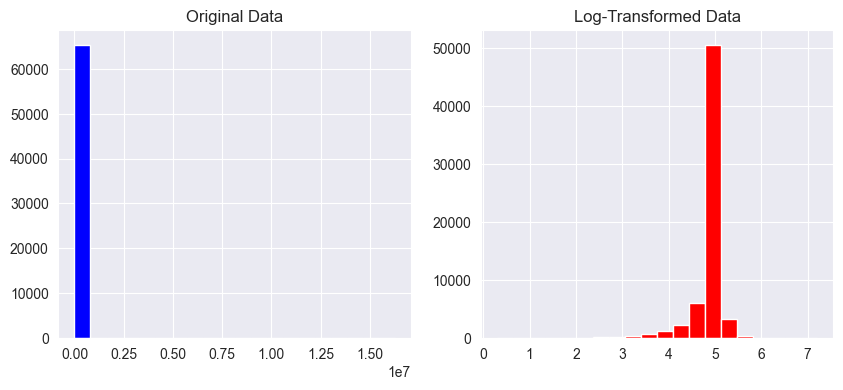

In [142]:
# Visula Composition
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['ConvertedCompYearly'], bins=20, color='blue')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(df['ConvertedCompYearly_log'], bins=20, color='red')
plt.title('Log-Transformed Data')
plt.show()

In [143]:
print("Original Skewness:", df['ConvertedCompYearly'].skew())
print("Log-Transformed Skewness:", df['ConvertedCompYearly_log'].skew())

Original Skewness: 88.43717992992127
Log-Transformed Skewness: -4.249465108379102


# 7. Feature Engineering
#### 7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:

In [151]:
df = pd.read_csv('')

Series([], Name: count, dtype: int64)

In [156]:
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': '1'})
df['YearsCodePro'] = df['YearsCodePro'].replace({'More than 50 years': '55'})

In [157]:
df['YearsCodePro'].value_counts()

YearsCodePro
1     5495
2     4168
3     4093
5     3526
10    3251
4     3215
6     2843
8     2549
7     2517
12    1777
15    1635
20    1549
9     1493
11    1312
13    1127
14    1082
25     998
16     946
18     867
17     814
30     689
24     632
19     516
22     492
23     448
26     426
21     380
27     380
28     342
35     285
29     196
40     194
32     194
34     169
38     134
33     132
36     119
31     106
37     104
45      56
42      55
39      54
41      51
55      50
44      42
43      37
46      21
50      14
48      14
49      11
47      10
Name: count, dtype: int64

In [175]:
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce').astype('Int64')
df['YearsCodePro'].fillna(df['YearsCodePro'].mean().astype(int))

YearsCodePro
1     5495
2     4168
3     4093
5     3526
10    3251
4     3215
6     2843
8     2549
7     2517
12    1777
15    1635
20    1549
9     1493
11    1312
13    1127
14    1082
25     998
16     946
18     867
17     814
30     689
24     632
19     516
22     492
23     448
26     426
21     380
27     380
28     342
35     285
29     196
40     194
32     194
34     169
38     134
33     132
36     119
31     106
37     104
45      56
42      55
39      54
41      51
55      50
44      42
43      37
46      21
50      14
48      14
49      11
47      10
Name: count, dtype: Int64

In [180]:
print(df['YearsCodePro'].dtypes)

object


ValueError: invalid literal for int() with base 10: 'Expert'

In [176]:
def categorize_years(value: int) -> int:
    if value <=3:
        return 'Beginner'
    elif 3 <= value <=10:
        return 'Intermediate'
    elif 10 <= value <=15:
        return 'Advanced'
    else:
        return 'Expert'
df['YearsCodePro'] = df['YearsCodePro'].apply(categorize_years)
df['YearsCodePro'].value_counts()        

YearsCodePro
Expert          25354
Intermediate    19394
Beginner        13756
Advanced         6933
Name: count, dtype: int64

In [183]:
df['ExperienceLevel'] = df['YearsCodePro']
df['ExperienceLevel'].value_counts()

ExperienceLevel
Expert          25354
Intermediate    19394
Beginner        13756
Advanced         6933
Name: count, dtype: int64